# PCA

In [ ]:
import numpy as np
import pandas as pd

k = 1

X = np.matrix(
    [[153, 56],
     [178, 54],
     [156, 115],
     [147, 41],
     [177, 104]]
)
print(f'X: \n{X} \n')
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0, ddof=1)
print(f'STD X: \n{X} \n')

cov_mat = np.cov(X, rowvar=0, bias=0)
print(f'Covariance Matrix: \n{cov_mat}\n')

from numpy import linalg as LA
w, v = LA.eig(cov_mat)
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]
# v.T[:1] = -v.T[:1]
print(f'Eigenvalues: \n{w}\n')
print(f'Eigenvectors: \n{v.T}\n')

selected_V = v.T[:k]

print(f'Selected Eigenvectors: \n{selected_V}\n')

new_X = np.matmul(X, selected_V.T)
print(f'Transformed PCA: \n{new_X}\n')

from sklearn.decomposition import PCA
pca = PCA(n_components=k)
df = pd.DataFrame(X)
pcs=pca.fit_transform(df)
pcs_df = pd.DataFrame(data=pcs, columns=[f'pc{i+1}' for i in range(k)])
print(f'PCA using sklearn: \n{pcs_df}\n')
print(f'PCA Covariance Matrix: \n{pca.get_covariance()}\n')
print(f'Selected Eigenvalues: \n{pca.explained_variance_}\n')
print(f'Selected Eigenvectors: \n{pca.components_}\n')

X: 
[[153  56]
 [178  54]
 [156 115]
 [147  41]
 [177 104]] 

STD X: 
[[-0.64146163 -0.54309084]
 [ 1.10164062 -0.60343426]
 [-0.43228936  1.23704024]
 [-1.05980617 -0.99566653]
 [ 1.03191653  0.90515139]] 

Covariance Matrix: 
[[1.         0.28452478]
 [0.28452478 1.        ]]

Eigenvalues: 
[1.28452478 0.71547522]

Eigenvectors: 
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Selected Eigenvectors: 
[[0.70710678 0.70710678]]

Transformed PCA: 
[[-0.83760508]
 [ 0.35228509]
 [ 0.5690448 ]
 [-1.45343868]
 [ 1.36971386]]

PCA using sklearn: 
        pc1
0  0.837605
1 -0.352285
2 -0.569045
3  1.453439
4 -1.369714

PCA Covariance Matrix: 
[[1.         0.28452478]
 [0.28452478 1.        ]]

Selected Eigenvalues: 
[1.28452478]

Selected Eigenvectors: 
[[-0.70710678 -0.70710678]]



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[(-3.0, 3.1),
 Text(0, 0.5, 'component 2'),
 (-5.0, 5.0),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

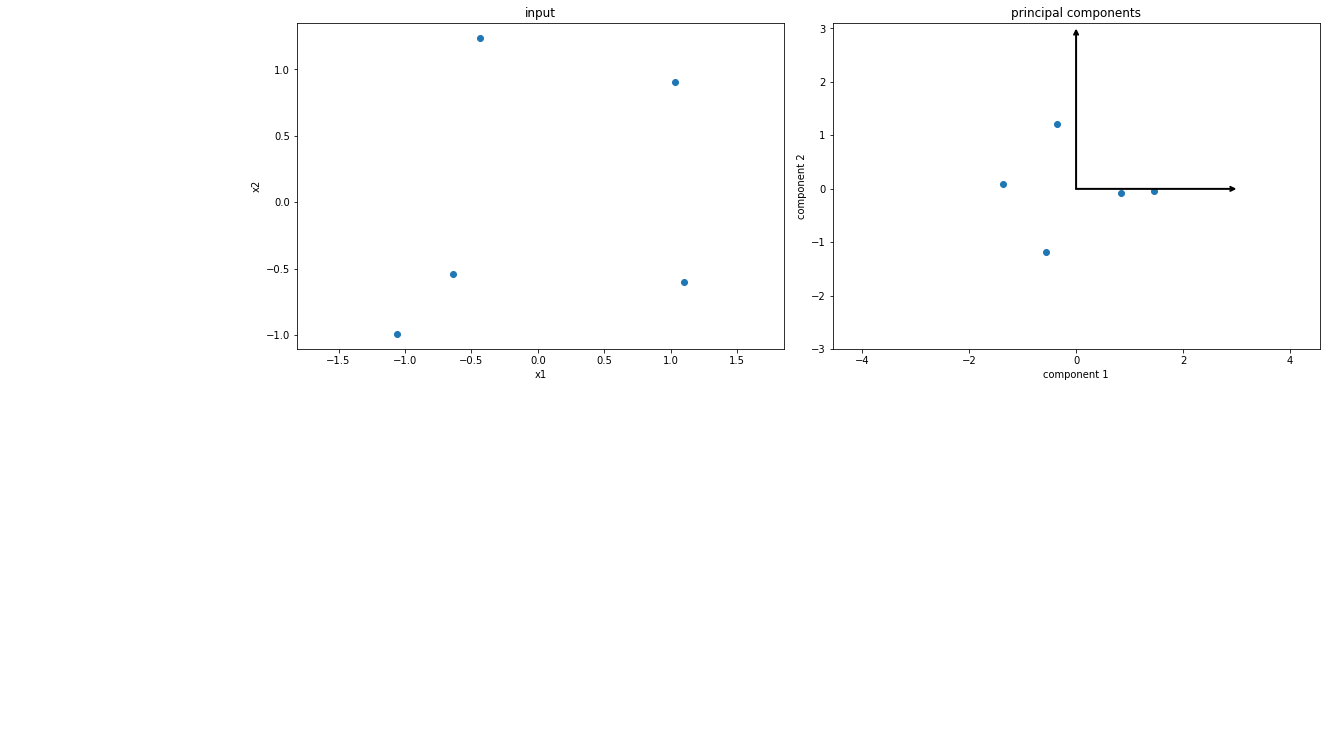

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns;

def draw_vector(v0, v1, ax=None):
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

pca = PCA()
X_pca = pca.fit_transform(X)

# plot data
ax[0].scatter(np.asarray(X[:,0].T)[0], np.asarray(X[:,1].T)[0])
for length, vector in zip(pca.explained_variance_, pca.components_):
    vv = vector * 5 * np.sqrt(length)
    draw_vector([0,0], [0,0] + vv, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x1', ylabel='x2', title='input')

# plot principal components
ax[1].scatter(X_pca[:, 0], X_pca[:, 1])
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

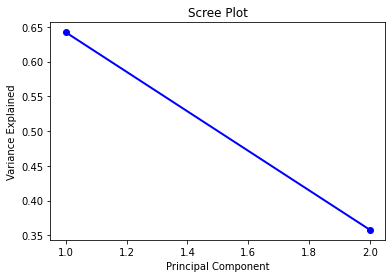

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# LDA

# RIDGE

In [ ]:
X = np.matrix(
    [[1129, 1.435],
     [1453, 1.601],
     [1656, 1.654],
     [1787, 1.803],
     [1611, 1.734]]
)
print(f'X: \n{X} \n')

X_train_mean = np.mean(X, axis=0)
print(f'X_train_mean: \n{X_train_mean} \n')
X_train_std = np.std(X, axis=0, ddof=1)
print(f'X_train_std: \n{X_train_std} \n')
X = (X - X_train_mean) / X_train_std
print(f'STD X: \n{X} \n')

y = [1.56, 1.64, 1.77, 1.83, 2.5]
y_train_mean = np.mean(y)
print(f'y_train_mean: \n{y_train_mean} \n')
y_train_std = np.std(y)
print(f'y_train_std: \n{y_train_std} \n')
y = [(a - y_train_mean)/y_train_std for a in y]
print(f'STD y: \n{y} \n')

# from sklearn import preprocessing
# y = preprocessing.scale(y)

from sklearn.linear_model import Ridge
alpha = 0.5
ridge = Ridge(fit_intercept=True, alpha=alpha)
ridge.fit(X, y - np.mean(y))
# 1. intercept and coef of the fit model
print(np.array([ridge.intercept_] + list(ridge.coef_)))

# add the w_0 intercept where the corresponding x_0 = 1
Xp = np.concatenate([np.zeros((X.shape[0], 1)), X], axis=1)


# 2. the closed form solution
print(f'X: \n{Xp}\n')
print(f'XT: \n{Xp.T}\n')
print(f'labmda*I: \n{alpha * np.eye(Xp.shape[1])}\n')
print(f'Y: \n{y}\n')
print(f'XT*Y: \n{Xp.T.dot(y)}\n')
print(f'XTX+labmda*I: \n{Xp.T.dot(Xp) + alpha * np.eye(Xp.shape[1])}\n')
print(f'(XTX+labmda*I)^-1: \n{np.linalg.inv(Xp.T.dot(Xp) + alpha * np.eye(Xp.shape[1]))}\n')
beta = np.linalg.inv(Xp.T.dot(Xp) + alpha * np.eye(Xp.shape[1])).dot(Xp.T).dot(y)
print(f'beta: \n{beta} \n')

X_test = np.matrix(
    [[1629, 1.635],
     [1853, 1.701],
     [1356, 1.454]]
)
print(f'X_test: \n{X_test} \n')

X_test = (X_test - X_train_mean) / X_train_std
print(f'STD X_test: \n{X_test} \n')

Xp_test = np.concatenate([np.zeros((X_test.shape[0], 1)), X_test], axis=1)
print(f'Adding zeros STD X_test: \n{Xp_test} \n')

y_pred = Xp_test.dot(beta.T)
print(f'y_pred: \n{y_pred} \n')

print(f'y_pred restandertaization: \n{y_pred*y_train_std+y_train_mean} \n')

X: 
[[1.129e+03 1.435e+00]
 [1.453e+03 1.601e+00]
 [1.656e+03 1.654e+00]
 [1.787e+03 1.803e+00]
 [1.611e+03 1.734e+00]] 

X_train_mean: 
[[1527.2       1.6454]] 

X_train_std: 
[[2.52575137e+02 1.40535761e-01]] 

STD X: 
[[-1.57656056 -1.49712784]
 [-0.29377397 -0.31593382]
 [ 0.50994726  0.06119439]
 [ 1.02860481  1.12142276]
 [ 0.33178246  0.63044452]] 

y_train_mean: 
1.86 

y_train_std: 
0.3337663853655727 

STD y: 
[-0.8988322765679699, -0.6591436694831784, -0.26964968297039116, -0.08988322765679706, 1.9175088566783351] 

[ 5.63675143e-17 -2.02000871e-01  7.60576750e-01]
X: 
[[ 0.         -1.57656056 -1.49712784]
 [ 0.         -0.29377397 -0.31593382]
 [ 0.          0.50994726  0.06119439]
 [ 0.          1.02860481  1.12142276]
 [ 0.          0.33178246  0.63044452]]

XT: 
[[ 0.          0.          0.          0.          0.        ]
 [-1.57656056 -0.29377397  0.50994726  1.02860481  0.33178246]
 [-1.49712784 -0.31593382  0.06119439  1.12142276  0.63044452]]

labmda*I: 
[[0.5 0. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
